In [33]:
import numpy as np
from Values import Values
import matplotlib.pyplot as plt

class Action():
    
    def __init__(self,name, agent, v_index):
        
        '''
        generic action class, similar to activity but not of agent type
        '''
        self.name = name
        self.agent = agent            #tie it to a given agent
        self.v_index = v_index          #index of value to be satisfied
        self.counter = 0              #for histogramming purposes
        
    def precondition(self):
        
        return True
        
    def do(self):
        
        self.agent.values.val_t[self.v_index] += self.agent.values.val_sat[self.v_index]
        self.counter += 1

class valuesTest():
    
    def __init__(self, decay, se, st, c, otc, num_steps):
        
        self.values = Values(decay, se, st, c, otc, self)
        self.actions = set([])
        self.step_counter = 0
        self.action_frequency = 12
        self.num_steps = num_steps
        self.data = np.zeros((num_steps,4))
        
        for i in range(4):
            self.actions.add(Action('action'+str(i), self, i))
        
    def act(self):
        #prioritize
        priority = self.values.prioritize()


        #act
        #find action that corresponds to priority
        current = None
        possible_actions = set(filter(lambda x: x.precondition(), self.actions))
        for value in priority:
                for action in possible_actions:
                    if value == action.v_index:
                        current = action
                        break
                if current != None:
                    break

        #update v_sat
        if current != None:
            #print(current.name)
            current.do()
    
    def step(self):
        self.values.decay_val()
        
        
        if self.step_counter % self.action_frequency == 0:
            
            self.act()

        self.data[self.step_counter,:] = self.values.val_t
        self.step_counter+= 1


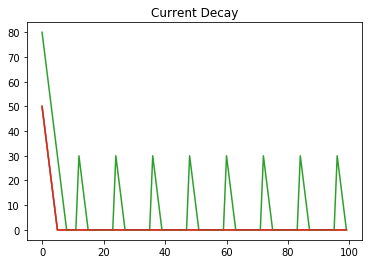

In [35]:
test = valuesTest(10,40,60,70,30,100)
for step in range(test.num_steps):
    test.step()

plt.plot(test.data)
plt.title('Current Decay')
plt.show()

    
    